# Document Clustering

In [1]:
!jupyter nbconvert --to html "document clustering.ipynb"

[NbConvertApp] Converting notebook document clustering.ipynb to html
[NbConvertApp] Writing 736685 bytes to document clustering.html


## Motivation

* Wir haben bisher jeweils immer zwei Dokumente mit der Cosinus-Ähnlichkeit verglichen.
* Beim Clustern sollen nun Gruppen/Klassen aus mehreren, evtl. beliebig vielen Dokumenten gebildet werden.

* Use Case: Automatisierte suche nach Gruppen von RSS-Feeds mit ähnlichem Inhalt durch einen Algorithmus.

#### Hypothese
* Clustering in Information Retrieval: **Alle** Dokumente aus einem Cluster sind relevant für eine Anfrage, wenn die Anfrage bereits zu **einem** Dokument passt.


Wir wollen hier keinen Clustering Algorithmus implementieren, sondern die Anwendung verstehen, ausprobieren und die "Landschaft" erkunden.

In [4]:
def plot_clusters(data, labels):
    colors = ["red", "blue", "green", "black"]
    for x, y, cluster_label in zip(data[:, 0], data[:, 1], labels):
        plt.scatter(x, y, color=colors[cluster_label])
    plt.title ="Einfärbung der Datenpunkte nach Cluster"

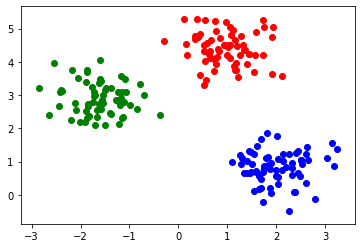

In [5]:
X, y = make_blobs(n_samples = 200, centers=3, cluster_std = 0.5, random_state = 0)
plot_clusters(X, y)

## Einordnung in die Pipeline

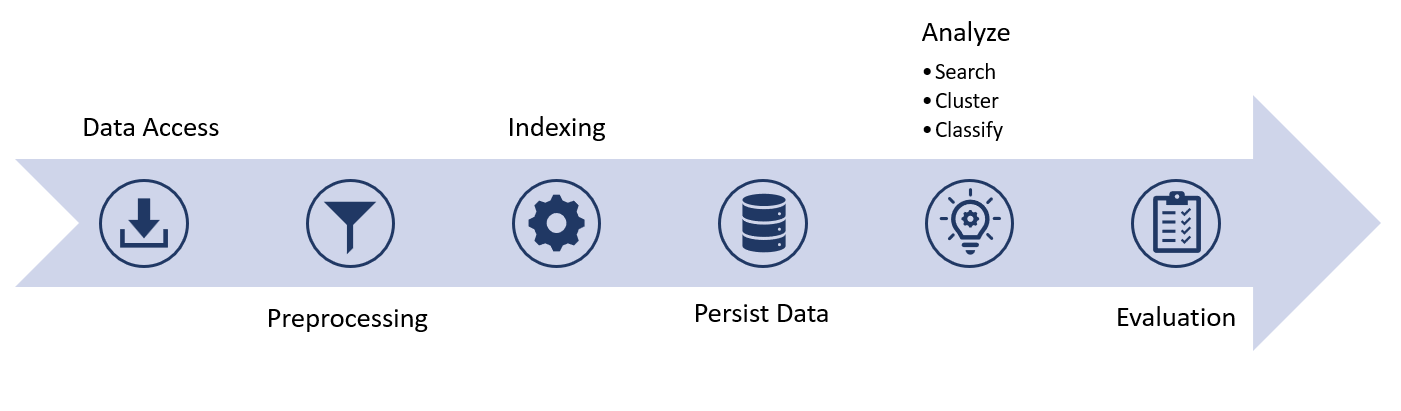

## Inhalt

1. Clustering: Theorie
2. K-means
3. K-means & der RSS-Feeds Korpus

### Literatur

* [IR Book, Stanford, Chapter 16: Flat Clustering](https://nlp.stanford.edu/IR-book/pdf/16flat.pdf)
* [IR Book, Stanford, Chapter 17: Hierarchical Clustering](https://nlp.stanford.edu/IR-book/pdf/17hier.pdf)

## Clustering: Definition

* Einteilen der Dokumentmenge in Subsets durch einen Algorithmus.
  * Es gibt dafür viele verschiedene Algorithmen und Ansätze
* Anforderungen an Cluster:
  * intern zueinander koherent
  * klar verschieden zu Dokumenten aus anderen Clustern
* Bildung der Cluster basierend auf einer _Distanzmetrik_.
* Clustering ist bereits maschinelles Lernen

### Maschinelles Lernen: 3 Typen

1. Überwachtes Lernen: "Lernen mit Lehrer"
  * Supervised Learning
  * "Lernen durch Anpassung an eine Zielgröße"
  * z.B. Neuronale Netze, Support Vector Machinen, Entscheidungsbäume, Lineare Regression, ...


2. Unüberwachtes Lernen: "Lernen ohne Lehrer"
  * Unsupervised Learning
  * "Lernen durch Optimierung nach einer Metrik"
  * z.B. **Clustering**, Autoencoder, Hauptkomponentenanalyse (PCA), Laten Dirichlet Allocation (LDA)

3. Bestärkendes Lernen: "Lernen mit Feedback"
  * Reinforcement Learning
  * "Lernen durch Anpassung an eine unregelmäßig verfügbare Zielgröße"
  * z.B. Q-learning, Alpha-Go, ...

### Clustering vs. Klassifizierung


Wichtiger Unterschied:

* Clustering: Einteilung der Dokumente in (beliebig viele) Gruppen anhand einer Metrik
   * unüberwachtes Lernen
* Klassifizierung: Zuweisung der Dokumente zu einer bestehenden Klasse anhand gelernter Gemeinsamkeiten.
   * überwachtes Lernen

### Clustering Typen
* Flat Clustering: Keine Zuweisungen der Cluster zueinander
* Hierarchical Clustering: Cluster werden in hierarchische Struktur unterteilt

### Cluster Zuweisungen
* Harte Zuweisung: jedes Dokument ist genau einem Cluster zugewiesen.
* Weiche Zuweisung: für jedes Dokument wird für jedes Cluster ein Score berechnet.

### Sklearn - Machine Learning in Python

* Nutzen wir hier für Clustering Algorithmen
* Python Modul
* ``pip install scikit-learn`` oder ``conda install scikit-learn``
* Baut auf die Module numpy, scipy und matplotlib auf
* Implementierungen vieler Algorithmen für maschinelles Lernen und Datenanalysen

* Die Anwendung eines scikit-learn Algorithmus funktioniert (fast) immer nach dem selben Prinzip.
* Pseudo-Code Beispiel


Instanziierung des Algorithmus
```
algorithmus = Algorithmus(config1=1, config2=2, ...)
```

Training
```
algorithmus.fit(X)
```

Anwendung des trainierten Models auf Daten
```
algorithmus.transform(X)
algorithmus.predict(X)
algorithmus.fit_transform(Y)
```

## 2. Clustering in der Anwendung: K-means

* K-means ist ein einfacher Algorithmus für das Clustern von Datenpunkten
* Er wird häufig als Baseline verwendet

* Wir nutzen die Implementierung aus [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* Was müssen wir konfigurieren?
  * die Kardinalität $n$, also die Anzahl der Cluster die gefunden werden soll

#### Wie funktioniert K-means?

Der Ablauf des Algorithmus ist iterativ nach folgenden Schritten:
1. Wähle zufällige Mittelpunkte für die $n$ Cluster.
2. Berechne die Distanz aller Punkte zu allen gewählten Mittelpunkten.
3. Weise jeden Datenpunkt dem nächstgelegenen Mittelpunkt zu.
4. Weise die Mittelpunkte neu zu durch das Berechnen des Mittelwertes aller seiner zugewiesenen Datenpunkte.
5. Wiederhole 1-4 bis die Neuzuweisungen konvergieren.

### Was nehmen wir aus dem Funktionsprinzip mit?

* Die initiale Zuweisung der Clustermittelpunkte ist _zufällig_ !
* Das bedeutet, jeder Durchlauf _könnte_ unter Umständen verschiedene Ergebnisse liefern.


* Dies kann gelöst werden durch das Festlegen eines gleichbleibenden Zufallswertes.
* Oder besser: Dem Durchlaufen verschiedener Durchgänge und der anschließenden Auswahl des Besten.

### Trockenübung mit fiktiven Daten

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Daten aus dem Beispiel der Einleitung
X 

# Konfiguration des Algorithmus
kmeans = KMeans(n_clusters=3)
# Ausführung des Algorithmus (Training)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [302]:
# gibt uns die Zuordnung zu den Clustern der Punkte (hier die ersten 10)
kmeans.labels_[:10]

array([2, 1, 1, 2, 1, 2, 0, 0, 1, 2])

In [303]:
# Vorhersage in welchem Cluster neue Datenpunkte landen
kmeans.predict([[0, 0], [12, 3]])

array([0, 0])

In [304]:
# Mittelpunkte der gefundenen Cluster
kmeans.cluster_centers_

array([[ 2.00955762,  0.8313862 ],
       [ 0.96573445,  4.39663084],
       [-1.62597658,  2.89784482]])

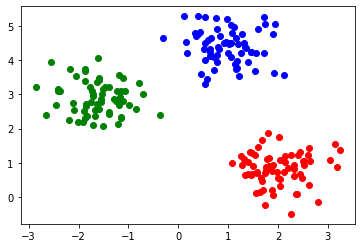

In [305]:
plot_clusters(X, kmeans.labels_)

### Evaluationsmetrik: Silhouetten-Koeffizient

* Bewertet die Qualität der Einteilung in die Cluster
* Berechnung der durchschnittlichen Intra-Cluster Distanz im Verhältnis zur durchschnittlichen Distanz zum nächsten Cluster.
* Werte von -1 bis 1:
  * -1: Es sind keine sich von einander abgrenzenden Cluster gefunden worden.
  * 0: Die Cluster sind nicht immer deutlich abgetrennt und es gibt Überschneidungen der Punktemengen.
  * 1: Die Cluster sind deutlich von einander abgetrennt.

In [55]:
from sklearn.metrics import silhouette_score

In [307]:
silhouette_score(X, kmeans.labels_)

0.7288999319569544

### Wie verhält sich der Algorithmus wenn wir die Anzahl Cluster erhöhen?

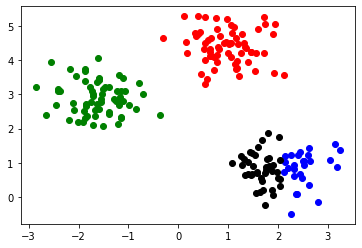

In [311]:
kmeans = KMeans(n_clusters=4).fit(X)
plot_clusters(X, kmeans.labels_)

In [312]:
silhouette_score(X, kmeans.labels_)

0.5915946533589372

### Evaluation

* K-means folgt der Anweisung auch 4 statt eigentlich 3 vorhandene Cluster zu finden.
* Es erfolgt die Unterteilung eines Clusters in zwei neue.
* Wir sehen der Silhouetten-Koeffizient verschlechtert sich.

#### Fazit: Die Wahl der Anzahl Cluster beeinflusst die Qualität Cluster enorm!

## 3. Anwendung von K-means auf den RSS-News Korpus

* Wie Ihnen evtl. in der Hacking Session aufgefallen ist, gibt es im Korpus Nachrichten aus 2 Kategorien:
  * Allgemeine: Wirtschaft, Politik etc.
  * IT: Technik, Produkte etc.
* Um es für die Analyse einfacher zu gestalten nutzen wir hier nur die technisches News.

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

#### Zunächst die Schritte 1 und 2: Data Access and Preprocessing.

In [24]:
stopwords_german = set(stopwords.words("german"))
tokenizer = RegexpTokenizer("\w+")

def tok(text):
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords_german]
    return tokens

In [149]:
DATA = "../../data/news/rss-tech.txt"
with open(DATA, "r", encoding="utf8") as f:
    data = f.read()
    data = data.split("\n")
print("Loaded", len(data), "documents.")

Loaded 316 documents.


In [150]:
# remove duplicates
data = list(set(data))
len(data)

173

#### Schritt 3: Indexing mit TF-IDF

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tok)
X = vectorizer.fit_transform(data)

In [152]:
X

<173x2141 sparse matrix of type '<class 'numpy.float64'>'
	with 3587 stored elements in Compressed Sparse Row format>

In [153]:
# das erste Dokument hat den TF-IDF Vektor:
X[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

#### Normalisierung

* Um unabhängig von der Länge der Vektoren zweier Dokumente zu werden, wird die Cosinus-Ähnlichkeit verwendet.
* K-means unterstützt jedoch nur die euklidische Distanz.
* Daher müssen wir zunächst eine Normalisierung vornehmen, das heißt alle Vektoren werden auf die Länge 1 gebracht.
* [Normalisierung mit scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization)

In [154]:
from sklearn.preprocessing import normalize

X = normalize(X)

In [155]:
np.linalg.norm(X[0].toarray())

1.0

### Voruntersuchung: Wie sehen unsere Daten eigentlich im 2-dimensionalen Raum aus?

* Dafür eignen sich Algorithmen für die Dimensionsreduktion
* Diese Algorithmen transformieren Datenpunkte aus einem n-dimensionalen Raum in einen z.B. 2-dimensionalen Raum
* Dafür wird üblicherweise die Hauptachsentransformation verwendet (Principle Component Analyse, PCA).
* Es wird versucht mit minimalem Informationsverlust die Daten mit weniger Dimensionen darzustellen.

* Wir wollen uns an dieser Stelle jedoch nur ein "Bild" von unseren Daten machen.
* Für die Visualisierung hoch-dimensionaler Daten im 2D-Raum eignet sich besonders der Algorithmus [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* t-SNE sollte jedoch nur für die Visualisierung genutzt werden. Sollen diese Daten weiterverarbeitet werden sollte eine PCA vorgezogen werden.

In [156]:
from sklearn.manifold import TSNE

In [158]:
tsne = TSNE(n_components=2, init='random')
X2d = tsne.fit_transform(X)
X2d.shape

(173, 2)

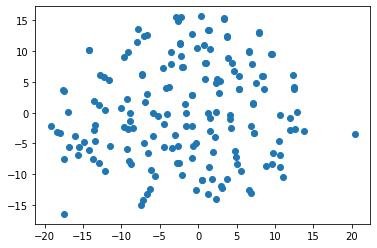

In [182]:
# Visualisierung der Dimensionsreduktions mittels t-SNE
plt.scatter(X2d[:, 0], X2d[:, 1])

### Analyse: was sehen wir?

* es scheint ein paar sehr ähnliche Dokumente zu geben.
* jedoch sind viele auch einzeln isoliert
* Annahme: es gibt also wohl einige sehr treffende Cluster, die Mehrheit wird dem aber nicht entsprechen.

In [195]:
kmeans = KMeans(n_clusters=30).fit(X)

In [196]:
kmeans.labels_

array([ 8,  3, 17, 22, 18, 16, 21,  9,  7, 23, 28,  9, 27, 19,  2,  3,  7,
        3, 18,  7,  8,  5, 26, 18, 14,  4, 22, 16, 13,  1, 17,  9,  9, 13,
       20, 20, 16,  9, 10, 11, 26, 26, 25,  6,  7, 17, 15, 22, 22, 26,  4,
        4, 26, 20, 24, 14,  3, 12,  2, 10,  1, 12, 19, 29,  3, 24, 19,  2,
       29, 27,  6,  3, 13,  4,  3,  9, 14, 12,  9, 13,  9, 24, 14, 10, 15,
        8,  0, 25, 21, 12, 15, 13, 19, 10,  4, 17,  1,  6,  9,  0,  6, 23,
       27, 11, 29, 29, 15, 19, 14, 19, 22, 29, 15, 17,  4, 23, 10,  8,  8,
       13, 17,  0, 15,  8, 29, 18,  4, 10, 26, 12, 28, 24, 10, 26, 28, 12,
       15, 14, 28,  3, 28, 11,  7, 20,  8, 15,  2,  7, 19,  8,  4, 22, 12,
       19,  4, 14,  9, 19, 25, 15, 25, 29,  7,  8, 22,  9,  2, 20, 19, 19,
        8,  5, 28])

### Betrachtung einzelner Cluster

In [127]:
# Indizes der Daten mit der Cluster-ID-Zuweisung 2
np.where(kmeans.labels_ == 0)

(array([ 16,  35,  67, 103, 112, 227], dtype=int64),)

In [210]:
def get_cluster(cluster, labels, ids=False):
    indices = []
    for idx, i in enumerate(labels):
        if i == cluster:
            if ids is not False:
                print(data[idx] + "\n")
            else:
                indices.append(idx)
    return indices

In [235]:
get_cluster(0, kmeans.labels_, True)

Überwachung und Repression: Aktivisten beklagen "multiple Grundrechtskrise" Seit fünfundzwanzig Jahren erscheint der Grundrechte-Report. 2021 stand im Zeichen der Klimakrise, der Corona-Pandemie und der Strafrechtsverschärfungen.

Mastercard will Bezahlen mit Gesichts- oder Handscan einführen Der Zahlungsdienstleister Mastercard will mit rein biometrischer Authentifizierung eine "neue Ära" des Bezahlens einläuten – mit einem "Winken" oder "Lächeln".

Lidl lässt Kunden Waren bald selbst scannen und bezahlen Lidl-Kunden werden ihren Einkauf in vielen deutschen Filialen bald an Self-Checkout-Kassen selbst scannen und bezahlen können. Laut einem Medienbericht steht die Einführung unmittelbar bevor. Wer immer schon mal davon geträumt hat, seinen Einkauf an der Kasse selbst einzuscannen, wird seinen Wunsch bald in vielen deutschen Lidl-Filialen erfüllt finden. Laut einem Bericht des Fachmediums "The Re...



[]

So wirklich gut passen die Dokumente in diesem Cluster nicht zusammen...

Das Bestätigt auch der mäßige Silhouetten-Koeffizient:

In [236]:
silhouette_score(X, kmeans.labels_)

0.07449244577174162

### Evaluation einzelner Cluster

* Berechnen des durchschnittlichen Silhouetten-Koeffizienten für jedes Cluster
* Sortierung nach bestem Score

In [191]:
from sklearn.metrics import silhouette_samples

In [238]:
def get_best_clusters(data, labels):
    s = silhouette_samples(data, labels)
    score = pd.DataFrame(columns=["n_clusters", "score"])
    for i in range(len(set(labels))):
        cluster_score = s[get_cluster(i, labels)].mean()
        score = score.append({"n_clusters": i, "score": cluster_score}, ignore_index=True)
    return score.sort_values("score", ascending=False)

In [239]:
get_best_clusters(X, kmeans.labels_)

,n_clusters,score
16,16.0,0.840378
5,5.0,0.591553
21,21.0,0.310840
1,1.0,0.254342
24,24.0,0.194511
13,13.0,0.192529
17,17.0,0.168404
11,11.0,0.159347
22,22.0,0.098565
12,12.0,0.085873


### Die besten Cluster

In [240]:
get_cluster(16,  kmeans.labels_, True)

Amazon: Anker Soundcore Motion Plus für rund 80 Euro Bluetooth-Lautsprecher sorgen immer und überall für guten Sound. Derzeit hat Amazon den Anker Soundcore Motion Plus günstiger im Angebot. Jetzt sparen!

Amazon: Anker Soundcore Motion Plus für rund 80 Euro Bluetooth-Lautsprecher sorgen immer und überall für guten Sound. Aktuell hat Amazon den Anker Soundcore Motion Plus günstiger im Angebot. Jetzt sparen!

Amazon: Anker Soundcore Motion Plus für rund 80 Euro Bluetooth-Lautsprecher sorgen immer und überall für guten Sound. Gerade hat Amazon den Anker Soundcore Motion Plus günstiger im Angebot. Jetzt sparen!



[]

In [241]:
get_cluster(5,  kmeans.labels_, True)

LoRaWAN: Netcologne vernetzt die Dinge in Köln Von Parkplatzüberwachung bis zur Baustellenerfassung: Mit dem energiesparenden IoT-Funk will Netcologne die Digitalisierung in der Stadt Köln voranbringen.

Smart City: Netcologne startet LoRaWAN-Funknetz in Köln​ Von Parkplatzüberwachung bis zur Baustellenerfassung: Mit dem energiesparenden IoT-Funk will Netcologne die Digitalisierung in der Stadt Köln voranbringen.



[]

### Das schlechteste Cluster

In [242]:
get_cluster(28,  kmeans.labels_, True)

Amazon: Espressomaschine von De'Longhi für 115 Euro Muntermacher gefällig? Mit der Espressomaschine De'Longhi Dedica Style EC 685 ist der rasch zubereitet. Gerade ist die Maschine bei Amazon günstiger im Angebot.

10 Prozent günstiger: Mähroboter-Deal bei Media Markt Sie lieben Ihren Garten, aber die Pflege ist sehr aufwendig? Ein Mähroboter nimmt Ihnen das Rasenmähen ab. Bei Media Markt ist ein Modell von Wolf-Garten aktuell reduziert.

Krümmt sich auf Knopfdruck: LGs Gaming-Monitor mit OLED-Display Monitore sind entweder klassisch plan oder sie sind leicht gekrümmt und erlauben so mehr Immersion etwa beim Spielen. LG zeigt eine Kombi aus beiden Varianten.

Media-Markt-Deal: Siemens-Kaffeevollautomat reduziert Kaffeegenuss zum Spitzenpreis: Media Markt hat zum Jubiläum des Onlineshops jetzt einen Kaffeevollautomaten von Siemens für nur 799 Euro im Angebot.

VR-Brille Project Cambria: Meta demonstriert AR-Fähigkeiten und Bildqualität Erste Demos zeigen, wie Metas VR-Brille Cambria die 

[]

### Ergebnis bisher

* Der Silhouetten Score beträgt 0.12. Dies zeigt an, dass viele Cluster nicht klar voneinander abgegrenzt sind oder große Unterschiede innerhalb aufweisen.

* Cluster 0: sehr gute Unterteilung, die 3 Dokumente sind fast gleich.
* Cluster 7: sehr gute Unterteilung, beide Dokumente haben den selben Inhalt.
* Cluster 1: auch wenn dies das am schlechtesten bewertete Cluster ist, handelt es sich bei fast allen um Werbung.
  
**Wurden zu wenige Cluster eingestellt?**

In [202]:
from tqdm.notebook import tqdm

def find_best_n(n=50):
    score = pd.DataFrame(columns=["n_clusters", "score"])

    for i in tqdm(range(2, n)):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
        sil_score = silhouette_score(X, kmeans.labels_)
        score = score.append({"n_clusters": i, "score": sil_score}, ignore_index=True)
    return score


In [203]:
scores = find_best_n()

  0%|          | 0/48 [00:00<?, ?it/s]

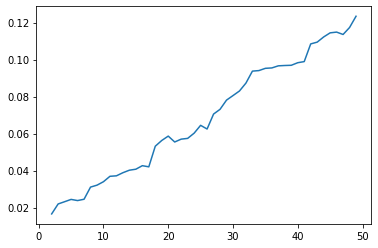

In [204]:
plt.plot(scores["n_clusters"], scores["score"])

## Fazit

* Je mehr zu findende Cluster eingestellt werden, desto besser wird auch der Silhouetten Score.
* Klar, denn je mehr Cluster, desto kleiner wird die Unterteilung.
* Überlegt werden muss daher, wieviele Cluster Sinn machen.
  * Zu wenige Cluster: Zu grobe Einteilung, Daten können nicht fein genug unterschieden werden.
  * Zu viele Cluster: Zu feine Einteilung, 1-Dokument Cluster bringen auch keinen Mehrwert.


#### Häufiges Problem im maschinellen Lernen:

* Overfitting / Überanpassung:
  * "zu viele Cluster"
  * der Algorithmus hat die Daten sozusagen "auswendig" gelernt und kann nun nicht generalisieren.
* Underfitting / Unteranpassung:
  * "zu wenige Cluster"
  * der Algorithmus hat die Daten zu oberflächlich gelernt und kann nun keine Details abbilden.

#### Aufgabe des Analysten:
* Anhand dem Inhalt, der Größe des Korpus, der Domäne etc. die Entscheidung treffen.
* **Viel Ausprobieren und evaluieren, welche Parameter Einstellung gut funktioniert!!!**

* Auch hier kann mit der Datenvorverarbeitung noch einiges herausgeholt werden.
* Verbesserungen:
  * Mehrere Durchläufe von K-means
  * Experimentieren mit dem Parameter
  * Dimensionsreduktion (PCA, haben wir noch nicht gemacht)
  * Einfließen weiter Informationen, wie Länge des Dokuments etc.

* Merke: Clustering ist unüberwachtes Lernen. Wir haben keine Zielgröße mit der wir unser Ergebnis direkt vergleichen können.
  * Müssen daher selbst "in die Cluster" schauen.

## Weitere Clustering Möglichkeiten

* z.B. DBSCAN: weiterer Clustering-Algorithmus
  * Findet Anzahl der Cluster selbst
  * Jedoch: benötigt die Einstellung der Distanz, dass ein Cluster gebildet wird
  * Es gibt dann Punkte, die nicht zugewiesen werden. Diese landen in einem "Einheitscluster".
  * Deterministisch (K-means nicht!)
* Hierarchisches Clustering

# Aufgaben

Hier geht es darum, selbst einmal eine Clustering Analyse auf dem Country-Korpus durchzuführen.

1. Laden Sie den Country Corpus mit geeigneter Vorverarbeitung.
2. Wenden Sie TF-IDF als Indexierung an.
3. Clustern Sie mit K-Means. Probieren Sie dazu verschiedene Parametereinstellungen für die Anzahl der Cluster. Welche Anzahl Cluster ist gut?
  * Clustern Sie die gesamten Dokumente. Werden Ähnliche Dokumente in Cluster eingeteilt, die wir schon zuvor bei der Ähnlichkeitsanalyse gefunden hatten?
  * Cluster Sie _nur_ einzelne Kapitel von Artikeln, wie etwa nach Geographie oder Kultur. Wie verändern sich die Cluster? Betrachten Sie auch den Silhouetten-Koeffizienten.
  * Analysieren und vergleichen Sie beide Ansätze.